In [146]:
#Took syntax help from https://www.datacamp.com/tutorial/principal-component-analysis-in-python

import pandas as pd

hurricane_df = pd.read_csv("hurricane_pop_dense_fatalities.csv", thousands=',')

In [147]:
hurricane_df

,Hurricane (YEAR),Landfall City,Lat,Lon,Landfall Population Density (people/sq mile),Pathway Towns,Pathway Town Population Densities (1),Fatalities,Max Wind Speed (mph),Pressure (mb),Storm Surge (ft),Precipitation Total (in)
0,Milton (2024),"Tampa, FL",27.95,-82.46,1500,"St. Petersburg, FL",4200,75,140,950,10,36
1,Helene (2024),"Panama City, FL",30.16,-85.66,1100,"Tallahassee, FL",1900,60,130,960,8,30
2,Idalia (2023),"Big Bend, FL",29.85,-83.59,1200,"Tallahassee, FL",1900,27,130,950,12,32
3,Ian (2022),"Fort Myers, FL",26.64,-81.87,1400,"Orlando, FL",1200,148,155,937,18,45
4,Nicole (2022),"Vero Beach, FL",27.64,-80.39,1100,"Orlando, FL",1200,10,75,985,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...
149,Mississippi-Alabama (1860),"Biloxi, MS",30.39,-88.89,550,"Mobile, AL",800,55,115,950,12,10
150,Mobile (1855),"Mobile, AL",30.69,-88.04,700,"Gulf Shores, AL",700,45,120,947,15,13
151,Savannah (1854),"Savannah, GA",32.08,-81.10,650,"Charleston, SC",600,34,110,960,10,9
152,Pensacola (1852),"Pensacola, FL",30.42,-87.22,500,"Destin, FL",105,19,100,970,8,7


In [148]:
hurricane_df.columns

Index(['Hurricane (YEAR)', 'Landfall City', 'Lat', 'Lon',
       'Landfall Population Density (people/sq mile)', 'Pathway Towns ',
       'Pathway Town Population Densities (1)', 'Fatalities',
       'Max Wind Speed (mph)', 'Pressure (mb)', 'Storm Surge (ft)',
       'Precipitation Total (in)'],
      dtype='object')

In [149]:
#hurricane_df_features = hurricane_df.drop(columns=["Fatalities","Hurricane (YEAR)","Landfall City","Pathway Towns ",""])
hurricane_df_features = hurricane_df.drop(columns=["Fatalities","Lat","Lon","Landfall Population Density (people/sq mile)","Hurricane (YEAR)","Landfall City","Pathway Towns ","Pathway Town Population Densities (1)"])

hurricane_df_features

,Max Wind Speed (mph),Pressure (mb),Storm Surge (ft),Precipitation Total (in)
0,140,950,10,36
1,130,960,8,30
2,130,950,12,32
3,155,937,18,45
4,75,985,6,30
...,...,...,...,...
149,115,950,12,10
150,120,947,15,13
151,110,960,10,9
152,100,970,8,7


In [150]:
hurricane_df_target = pd.DataFrame(hurricane_df["Fatalities"])
hurricane_df_target

,Fatalities
0,75
1,60
2,27
3,148
4,10
...,...
149,55
150,45
151,34
152,19


In [151]:
# add column to indicate if fatalities greater than 100
# 0 for no
# 1 for yes
hurricane_df_target['gt100'] = hurricane_df_target['Fatalities'].apply(lambda x: '<=100' if x <= 100 else '> 100')
hurricane_df_target

,Fatalities,gt100
0,75,<=100
1,60,<=100
2,27,<=100
3,148,> 100
4,10,<=100
...,...,...
149,55,<=100
150,45,<=100
151,34,<=100
152,19,<=100


In [152]:
# add column to indicate if fatalities greater than 250
# 0 for no
# 1 for yes
hurricane_df_target['gt250'] = hurricane_df_target['Fatalities'].apply(lambda x: '<=250' if x <= 250 else '> 250')
hurricane_df_target

,Fatalities,gt100,gt250
0,75,<=100,<=250
1,60,<=100,<=250
2,27,<=100,<=250
3,148,> 100,<=250
4,10,<=100,<=250
...,...,...,...
149,55,<=100,<=250
150,45,<=100,<=250
151,34,<=100,<=250
152,19,<=100,<=250


In [153]:
# add column to indicate if fatalities greater than 500
# 0 for no
# 1 for yes
hurricane_df_target['gt500'] = hurricane_df_target['Fatalities'].apply(lambda x: '<=500' if x <= 500 else '> 500')
hurricane_df_target

,Fatalities,gt100,gt250,gt500
0,75,<=100,<=250,<=500
1,60,<=100,<=250,<=500
2,27,<=100,<=250,<=500
3,148,> 100,<=250,<=500
4,10,<=100,<=250,<=500
...,...,...,...,...
149,55,<=100,<=250,<=500
150,45,<=100,<=250,<=500
151,34,<=100,<=250,<=500
152,19,<=100,<=250,<=500


In [154]:
# add column to indicate if fatalities greater than 1000
# 0 for no
# 1 for yes
hurricane_df_target['gt1000'] = hurricane_df_target['Fatalities'].apply(lambda x: '<=1000' if x <= 1000 else '> 1000')
hurricane_df_target

,Fatalities,gt100,gt250,gt500,gt1000
0,75,<=100,<=250,<=500,<=1000
1,60,<=100,<=250,<=500,<=1000
2,27,<=100,<=250,<=500,<=1000
3,148,> 100,<=250,<=500,<=1000
4,10,<=100,<=250,<=500,<=1000
...,...,...,...,...,...
149,55,<=100,<=250,<=500,<=1000
150,45,<=100,<=250,<=500,<=1000
151,34,<=100,<=250,<=500,<=1000
152,19,<=100,<=250,<=500,<=1000


In [155]:
# add column to indicate if fatalities are in range
# 0-100 for fatalities between 0 - 100
# 101-500 for fatalities between 101 - 500
# 501- for fatalities gt 500
def getRange(x):
  if x <= 100:
    return '0-100'
  if x > 500:
    return '501-'

  return '101-500'

hurricane_df_target['multi'] = hurricane_df_target['Fatalities'].apply(lambda x: getRange(x))
hurricane_df_target

,Fatalities,gt100,gt250,gt500,gt1000,multi
0,75,<=100,<=250,<=500,<=1000,0-100
1,60,<=100,<=250,<=500,<=1000,0-100
2,27,<=100,<=250,<=500,<=1000,0-100
3,148,> 100,<=250,<=500,<=1000,101-500
4,10,<=100,<=250,<=500,<=1000,0-100
...,...,...,...,...,...,...
149,55,<=100,<=250,<=500,<=1000,0-100
150,45,<=100,<=250,<=500,<=1000,0-100
151,34,<=100,<=250,<=500,<=1000,0-100
152,19,<=100,<=250,<=500,<=1000,0-100


In [156]:
from sklearn.preprocessing import StandardScaler


x = StandardScaler().fit_transform(hurricane_df_features) # normalizing

In [157]:
#Checking mean and std
import numpy as np

np.mean(x),np.std(x)

(2.739511359464672e-16, 1.0)

In [158]:
# Converting normalized features into table
feature_columns = ['f_'+str(i) for i in range(x.shape[1])]


In [159]:
normalized_hurricane_features = pd.DataFrame(x,columns=feature_columns)
normalized_hurricane_features

,f_0,f_1,f_2,f_3
0,0.838642,-0.166664,-0.075443,1.708331
1,0.467519,0.290845,-0.513865,1.119339
2,0.467519,-0.166664,0.362979,1.315670
3,1.395327,-0.761426,1.678246,2.591818
4,-1.573658,1.434619,-0.952287,1.119339
...,...,...,...,...
149,-0.089166,-0.166664,0.362979,-0.843966
150,0.096396,-0.303917,1.020613,-0.549471
151,-0.274728,0.290845,-0.075443,-0.942132
152,-0.645851,0.748355,-0.513865,-1.138462


In [160]:
from sklearn.decomposition import PCA
pca_hurricane = PCA(n_components=2)
p_hurricane = pca_hurricane.fit_transform(x)

In [161]:
#Back to dataframe
p_hurricane_df = pd.DataFrame(data = p_hurricane, columns = ['pc1', 'pc2'])
p_hurricane_df

,pc1,pc2
0,-0.841480,1.568989
1,-0.017296,1.123391
2,-0.797665,1.151479
3,-2.622011,2.027007
4,2.062011,1.461070
...,...,...
149,-0.094069,-0.877135
150,-0.691788,-0.739045
151,0.536306,-0.869364
152,1.290678,-0.932957


In [162]:
#It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.
print('Explained variability per principal component: {}'.format(pca_hurricane.explained_variance_ratio_))

Explained variability per principal component: [0.64428303 0.24132629]


<Figure size 640x480 with 0 Axes>

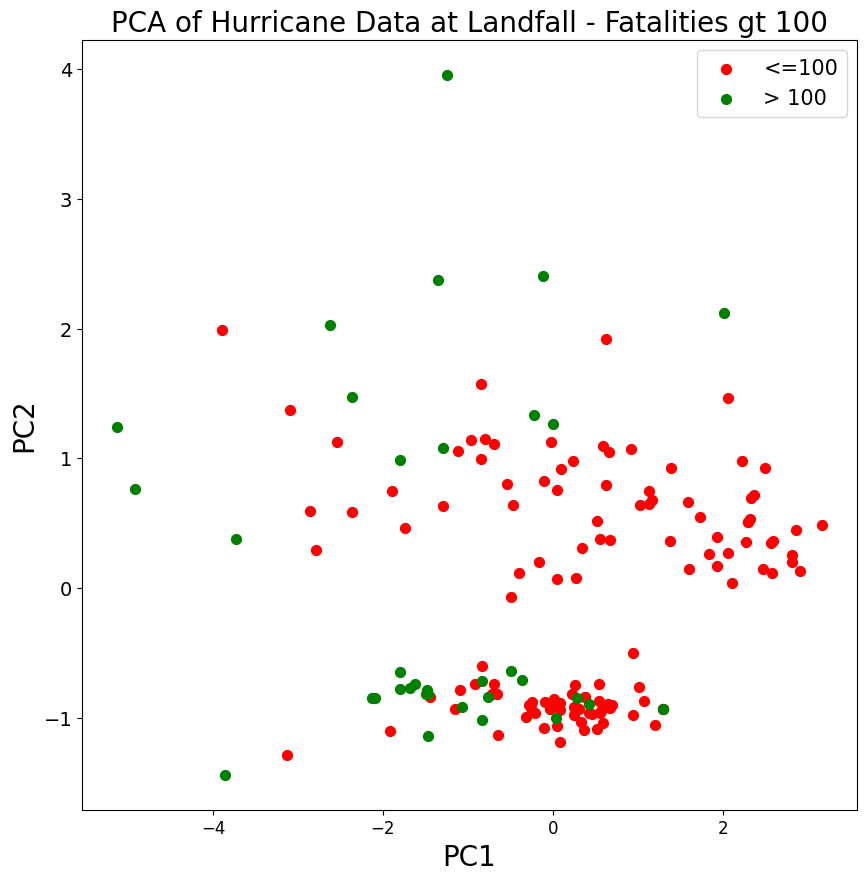

In [163]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("PCA of Hurricane Data at Landfall - Fatalities gt 100",fontsize=20)
targets = ['<=100','> 100']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = hurricane_df_target['gt100'] == target
    plt.scatter(p_hurricane_df.loc[indicesToKeep, 'pc1']
               , p_hurricane_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


<Figure size 640x480 with 0 Axes>

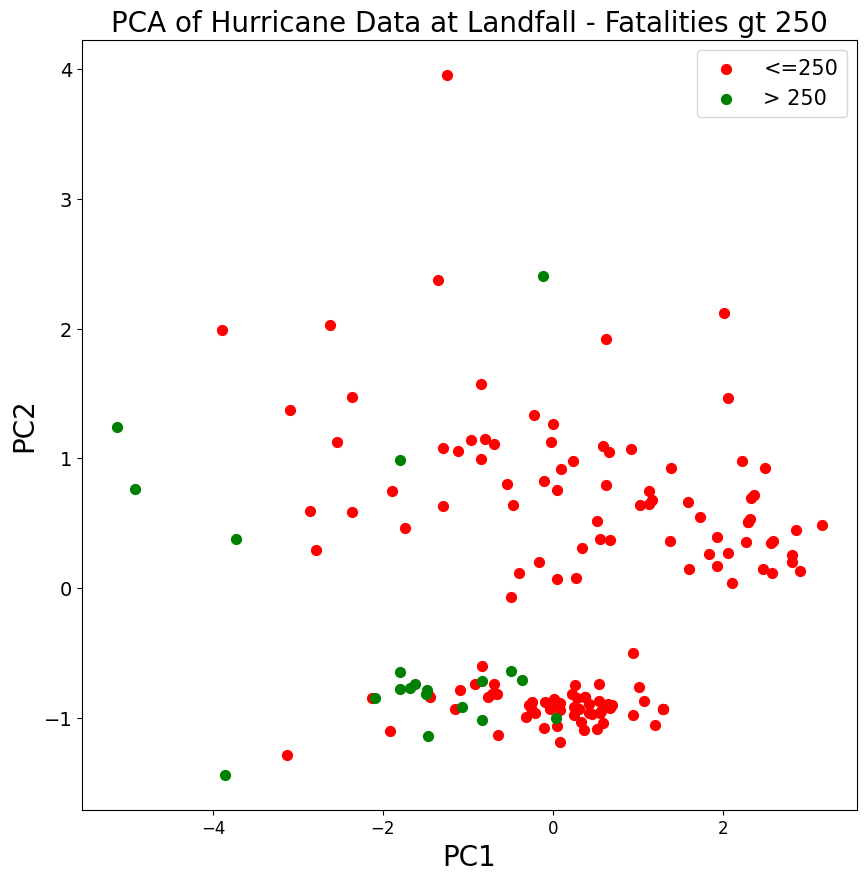

In [164]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("PCA of Hurricane Data at Landfall - Fatalities gt 250",fontsize=20)
targets = ['<=250','> 250']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = hurricane_df_target['gt250'] == target
    plt.scatter(p_hurricane_df.loc[indicesToKeep, 'pc1']
               , p_hurricane_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


<Figure size 640x480 with 0 Axes>

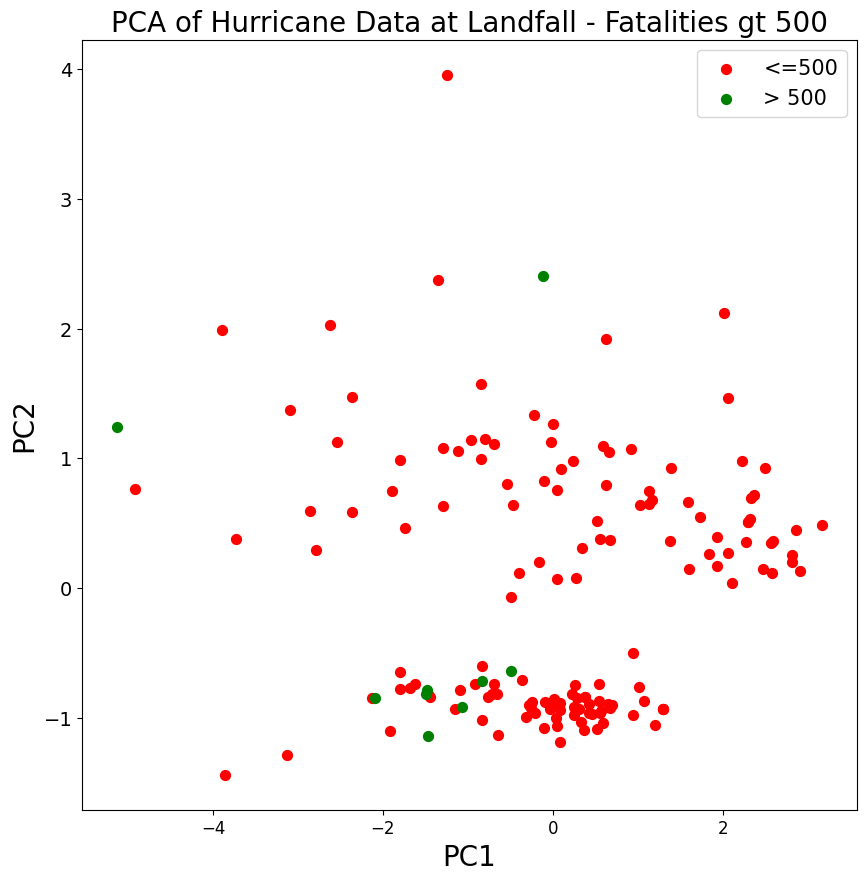

In [165]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("PCA of Hurricane Data at Landfall - Fatalities gt 500",fontsize=20)
targets = ['<=500','> 500']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = hurricane_df_target['gt500'] == target
    plt.scatter(p_hurricane_df.loc[indicesToKeep, 'pc1']
               , p_hurricane_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


<Figure size 640x480 with 0 Axes>

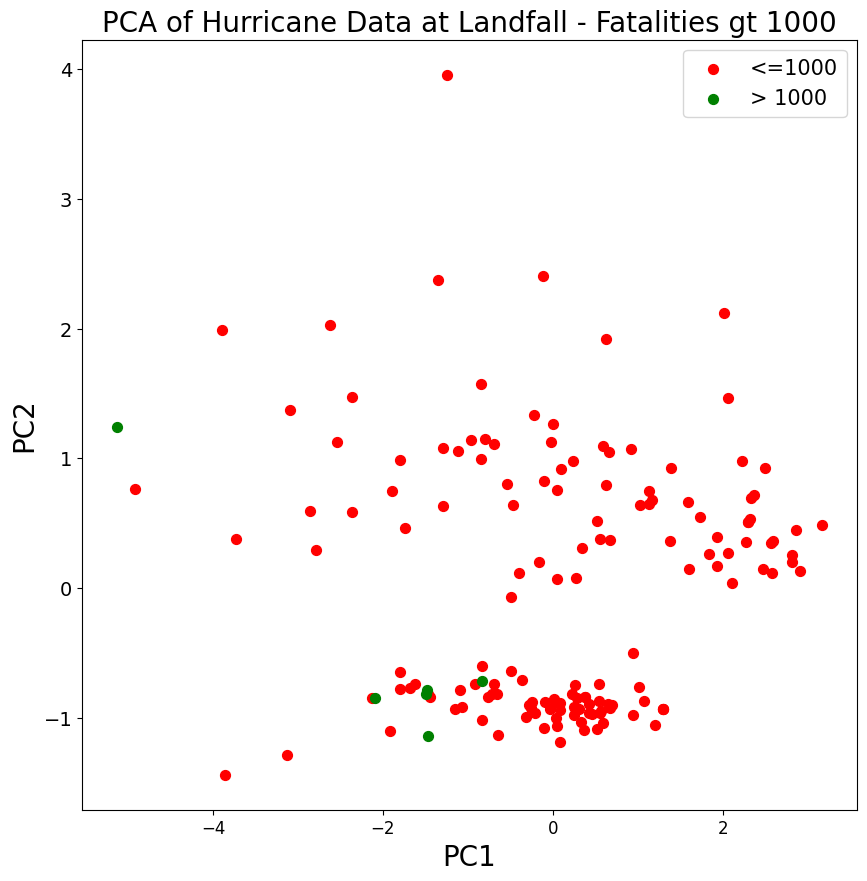

In [166]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("PCA of Hurricane Data at Landfall - Fatalities gt 1000",fontsize=20)
targets = ['<=1000','> 1000']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = hurricane_df_target['gt1000'] == target
    plt.scatter(p_hurricane_df.loc[indicesToKeep, 'pc1']
               , p_hurricane_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


<Figure size 640x480 with 0 Axes>

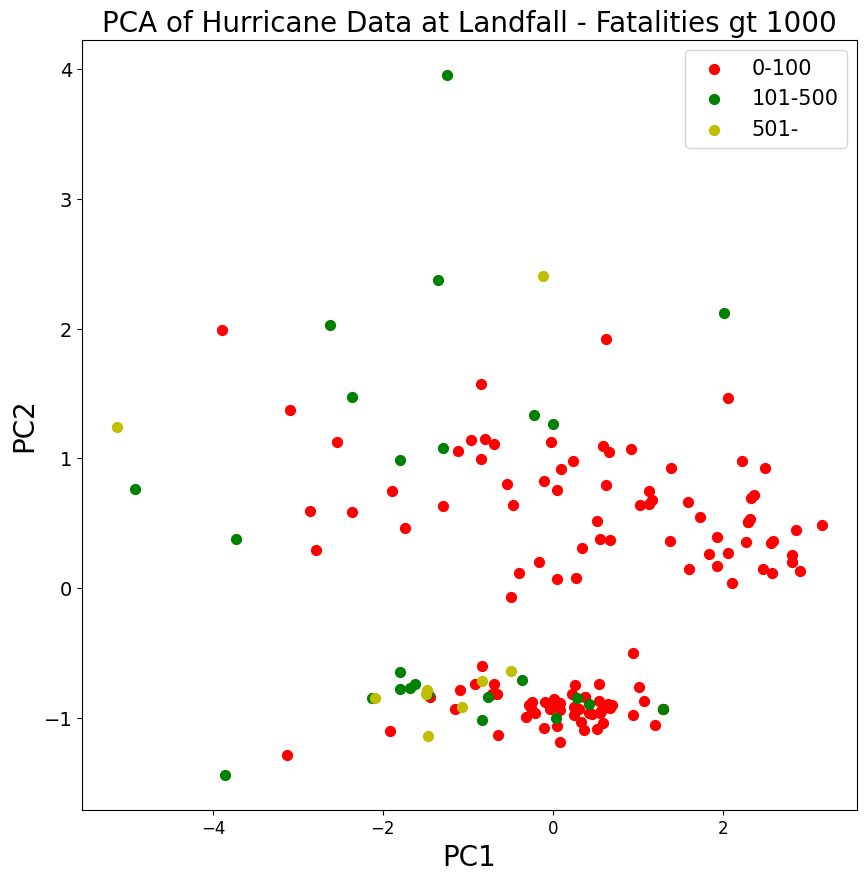

In [167]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("PCA of Hurricane Data at Landfall - Fatalities gt 1000",fontsize=20)
targets = ['0-100','101-500','501-']
colors = ['r', 'g','y']
for target, color in zip(targets,colors):
    indicesToKeep = hurricane_df_target['multi'] == target
    plt.scatter(p_hurricane_df.loc[indicesToKeep, 'pc1']
               , p_hurricane_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})